In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [ ]:
df_crime = pd.read_csv("crime_dv.csv")
df_crime.head(10)

,All India/State/Union Territory,2011 - educated Rural - Person,2011 - educatedUrban - Persons,Actual Strength of Police force - Total,Arson,Assault On Women,Attempt to commit Culpable Homicide,Attempt To Commit Murder,Attempt To Commit Rape,Crime Rate,...,Rape,Rape 1,Rate of Total Cognizable Crimes,Rate of Total Cognizable Crimes 1,Rate of Violent Crimes,Riots,Robbery,Total Number of IPC cases for Investigation including pending Cases from previous year,Total Sexual Offences Under IPC,Total Violent Crimes
0,A. and N. Islands,85,90,4043.0,5,41,2,11,0,30.00,...,32,32,36.8,44.2,18.4,10,2,1466,78,99
1,Andhra Pradesh,60,80,89404.0,450,4547,1,1540,165,32.80,...,961,961,13.1,65.1,14.0,1013,433,241502,8322,7147
2,Arunachal Pradesh,60,83,7455.0,39,121,0,48,10,35.50,...,83,83,28.6,57.4,40.6,33,61,3808,217,523
3,Assam,69,89,54069.0,743,3099,14,1142,227,34.20,...,1980,1980,11.6,123.4,45.9,2640,1038,142823,5307,14590
4,Bihar,60,77,67546.0,517,572,463,4379,484,4.60,...,1127,1127,5.0,31.3,33.6,13566,1600,245409,2252,34277
5,Chandigarh,81,86,6156.0,13,87,4,33,6,22.22,...,59,59,52.0,62.3,26.3,33,65,6105,154,440
6,Chhatisgarh,66,84,44107.0,297,2122,0,716,21,29.00,...,1436,1436,43.4,49.6,27.3,809,405,64304,3658,6917
7,D. and N. Haveli,64,90,306.0,5,2,0,1,0,4.23,...,5,5,8.7,11.1,9.6,6,2,761,8,39
8,Daman and Diu,82,89,351.0,0,3,3,6,0,4.85,...,2,2,7.7,14.6,12.0,4,5,379,5,37
9,Delhi,82,86,75117.0,190,4322,988,770,70,86.96,...,2096,2096,166.9,169.1,92.5,160,6464,100416,7849,18765


In [ ]:
df_crime=df_crime.dropna()

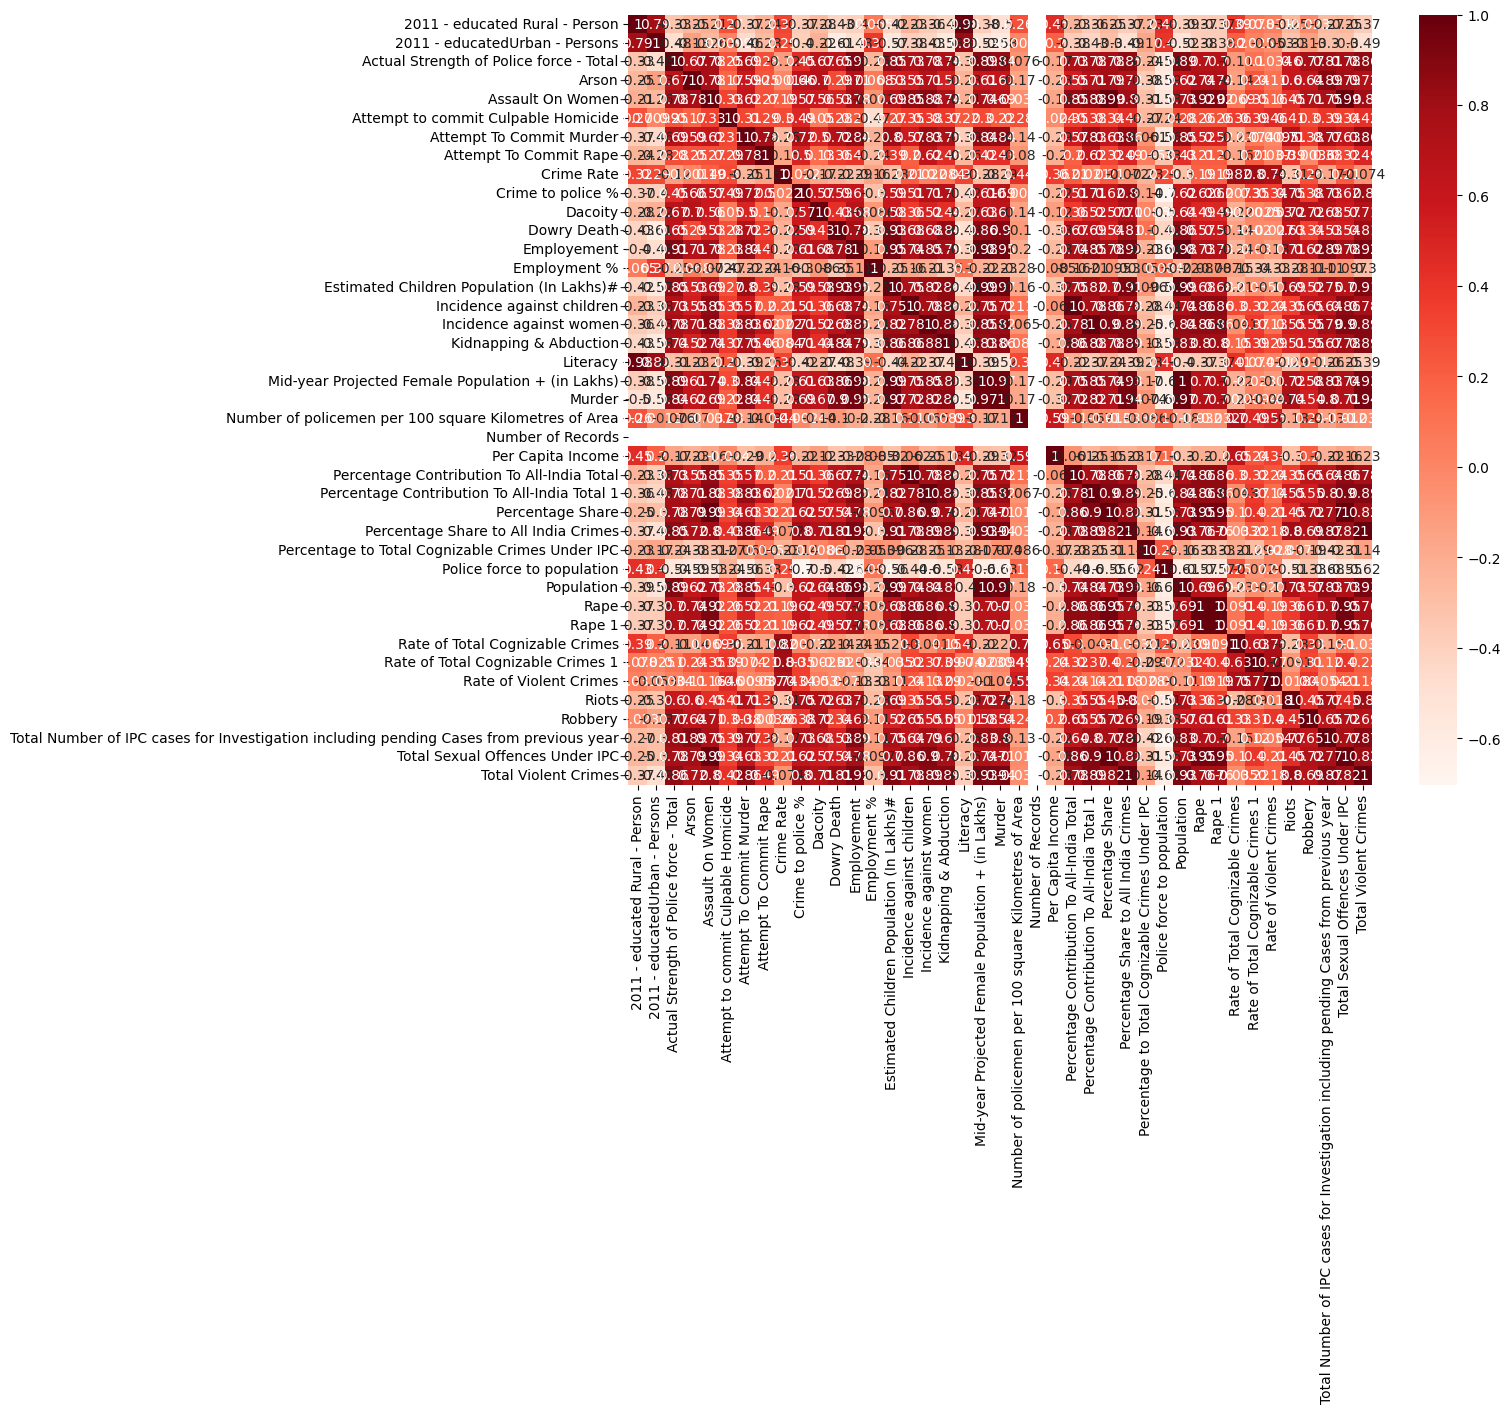

In [ ]:
#finding correlation b/w all the coefficients sing Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_crime.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#since total violent crimes is our target varibale
y = df_crime["Total Violent Crimes"] 
cor_target = abs(cor["Total Violent Crimes"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.7] #if correlation > 0.7 then hihgly correlated
relevant_features

Actual Strength of Police force - Total                                                   0.855055
Arson                                                                                     0.721331
Assault On Women                                                                          0.796802
Attempt To Commit Murder                                                                  0.862410
Crime to police %                                                                         0.799667
Dacoity                                                                                   0.708462
Dowry Death                                                                               0.812338
Employement                                                                               0.920559
Estimated Children Population (In Lakhs)#                                                 0.908702
Incidence against children                                                                0.776559
Incidence 

#MULTILINEAR REGRESSION MODEL TO PREDICT TOTAL VIOLENT CRIMES

In [ ]:
x = df_crime[['Actual Strength of Police force - Total', 'Arson', 'Assault On Women','Attempt To Commit Murder','Crime to police %',
              'Dacoity','Dowry Death','Employement','Estimated Children Population (In Lakhs)#','Incidence against children','Incidence against women',
              'Kidnapping & Abduction','Mid-year Projected Female Population + (in Lakhs)','Murder','Percentage Contribution To All-India Total',
              'Percentage Contribution To All-India Total 1','Population','Rape','Rape 1','Riots','Robbery','Total Number of IPC cases for Investigation including pending Cases from previous year',
              'Total Sexual Offences Under IPC']]
y = df_crime['Total Violent Crimes']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25) 

In [ ]:
from sklearn.linear_model import LinearRegression
#Fitting the Multiple Linear Regression model
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [ ]:
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  -61.575648678957805
Coefficients:


[('Actual Strength of Police force - Total', 0.0017925975286013085),
 ('Arson', -0.3700007714705866),
 ('Assault On Women', -0.9060450656236589),
 ('Attempt To Commit Murder', 1.7774111729509638),
 ('Crime to police %', 902.2289801063273),
 ('Dacoity', 1.2632082024878253),
 ('Dowry Death', -0.008884862715636837),
 ('Employement', -4.33821921927242e-05),
 ('Estimated Children Population (In Lakhs)#', -7.397648156695131),
 ('Incidence against children', 0.3851111946078345),
 ('Incidence against women', 0.3131679207103436),
 ('Kidnapping & Abduction', 0.671826689668585),
 ('Mid-year Projected Female Population + (in Lakhs)', 20.86655811887293),
 ('Murder', 0.6834868569116809),
 ('Percentage Contribution To All-India Total', -202.23285054255413),
 ('Percentage Contribution To All-India Total 1', -621.2110572904095),
 ('Population', -8.170532638533765e-05),
 ('Rape', 0.5935693433543687),
 ('Rape 1', 0.5935693433682385),
 ('Riots', 1.196431256115241),
 ('Robbery', 0.9782179030131977),
 ('Tot

In [ ]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [ 2082.88171409  8426.53516735 37710.34388877   836.54260495
   663.67435157   472.8895196  30467.79042784   501.01321333]


In [ ]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head(20)

,Actual value,Predicted value
33,2130,2082.881714
11,8623,8426.535167
32,41889,37710.343889
31,853,836.542605
10,550,663.674352
2,523,472.889520
34,27798,30467.790428
5,440,501.013213


In [ ]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 99.38
Mean Absolute Error: 916.6606372472959
Mean Square Error: 3081149.0955448826
Root Mean Square Error: 1755.320225925994
